In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [23]:
# Load the preprocessed and clustered data
data = pd.read_csv('data/clustered_vgchartz_2024.csv')

In [24]:
# Select features and target variable
features = ['genre', 'critic_score', 'publisher', 'cluster']
target = 'total_sales'

X = data[features]
y = data[target]


In [34]:
# Discretize the target variable into bins for classification
sales_bins = pd.cut(y, bins=5, labels=[0, 1, 2, 3, 4])
y_class = sales_bins

# Preprocess Data for Modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=0)

numeric_features = ['critic_score']
categorical_features = ['genre', 'publisher', 'cluster']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [35]:
# Build and Train the Regression Model
regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

regression_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['critic_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['genre', 'publisher',
                                                   'cluster'])])),
                ('regressor', LinearRegression())])

In [36]:
# Evaluate the Regression Model
y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 4.481520209802395
R^2 Score: 0.34444948089212535


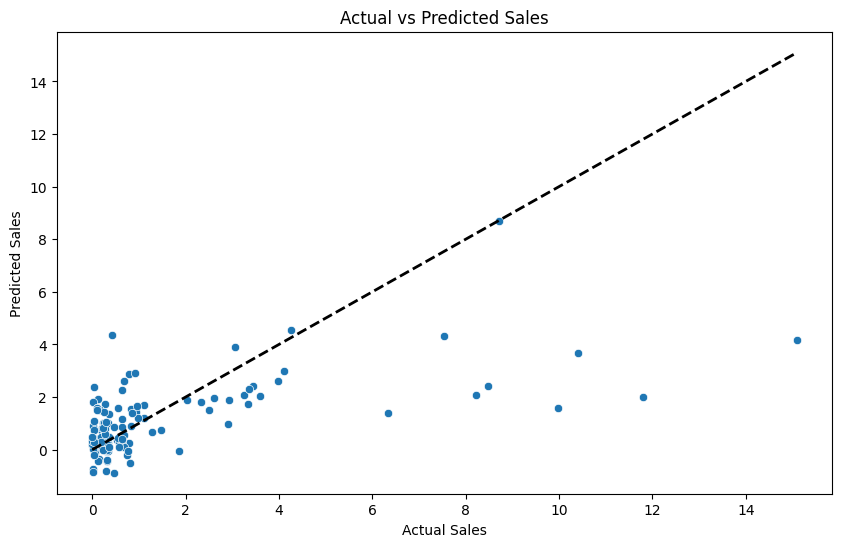

In [37]:
# Visualize Predictions vs Actual Sales
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results)
plt.plot([results['Actual'].min(), results['Actual'].max()], 
         [results['Actual'].min(), results['Actual'].max()], 'k--', lw=2)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [38]:
# Build and Train the Classification Model
classification_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

classification_model.fit(X_train_class, y_train_class)

# Evaluate the Classification Model
y_pred_class = classification_model.predict(X_test_class)

accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy}')

Classification Accuracy: 0.9008264462809917


In [42]:
# Function to make a prediction with random input values
def make_random_prediction(model, data):
    genres = data['genre'].unique()
    publishers = data['publisher'].unique()
    clusters = data['cluster'].unique()

    random_genre = random.choice(genres)
    random_critic_score = random.uniform(60, 99)  # Updated range for critic score
    random_publisher = random.choice(publishers)
    random_cluster = random.choice(clusters)

    random_data = pd.DataFrame({
        'genre': [random_genre],
        'critic_score': [random_critic_score],
        'publisher': [random_publisher],
        'cluster': [random_cluster]
    })

    prediction = model.predict(random_data)
    return {
        'Genre': random_genre,
        'Critic Score': random_critic_score,
        'Publisher': random_publisher,
        'Cluster': random_cluster,
        'Predicted Sales': prediction[0]
    }

# Make a random prediction
random_prediction = make_random_prediction(regression_model, data)
print('Random Prediction:', random_prediction)

Random Prediction: {'Genre': 'Action', 'Critic Score': 86.69454261113052, 'Publisher': 'Paradox Interactive', 'Cluster': np.int64(1), 'Predicted Sales': np.float64(30.11163286593796)}
